## Part - 1 Visualize Missing Data

In [9]:
import pandas as pd
import numpy as np

df = pd.read_excel("datapreprocessing.xlsx")
df.head()

,Country,Age,Gender,Occupation,Employment Status,Employement Type,Salary,Purchased
0,Poland,34.0,Male,Salaried,Yes,Permanent,72000.0,No
1,Spain,42.0,Female,Business,Yes,Temporary,48000.0,Yes
2,Germany,29.0,Male,Business,No,Temporary,54000.0,No
3,Spain,38.0,Male,Business,No,Permanent,61000.0,No
4,Germany,32.0,Male,Salaried,NaN,Permanent,NaN,Yes


In [10]:
df.columns

Index(['Country', 'Age', 'Gender', 'Occupation', 'Employment Status',
       'Employement Type', 'Salary', 'Purchased'],
      dtype='object')

In [13]:
print(df.isnull().sum())
print(df.isnull().mean()*100)

Country              0
Age                  3
Gender               0
Occupation           2
Employment Status    3
Employement Type     3
Salary               4
Purchased            0
dtype: int64
Country               0.0
Age                  15.0
Gender                0.0
Occupation           10.0
Employment Status    15.0
Employement Type     15.0
Salary               20.0
Purchased             0.0
dtype: float64


In [16]:
#pip install missingno in cmd
import missingno as msno

<AxesSubplot:>

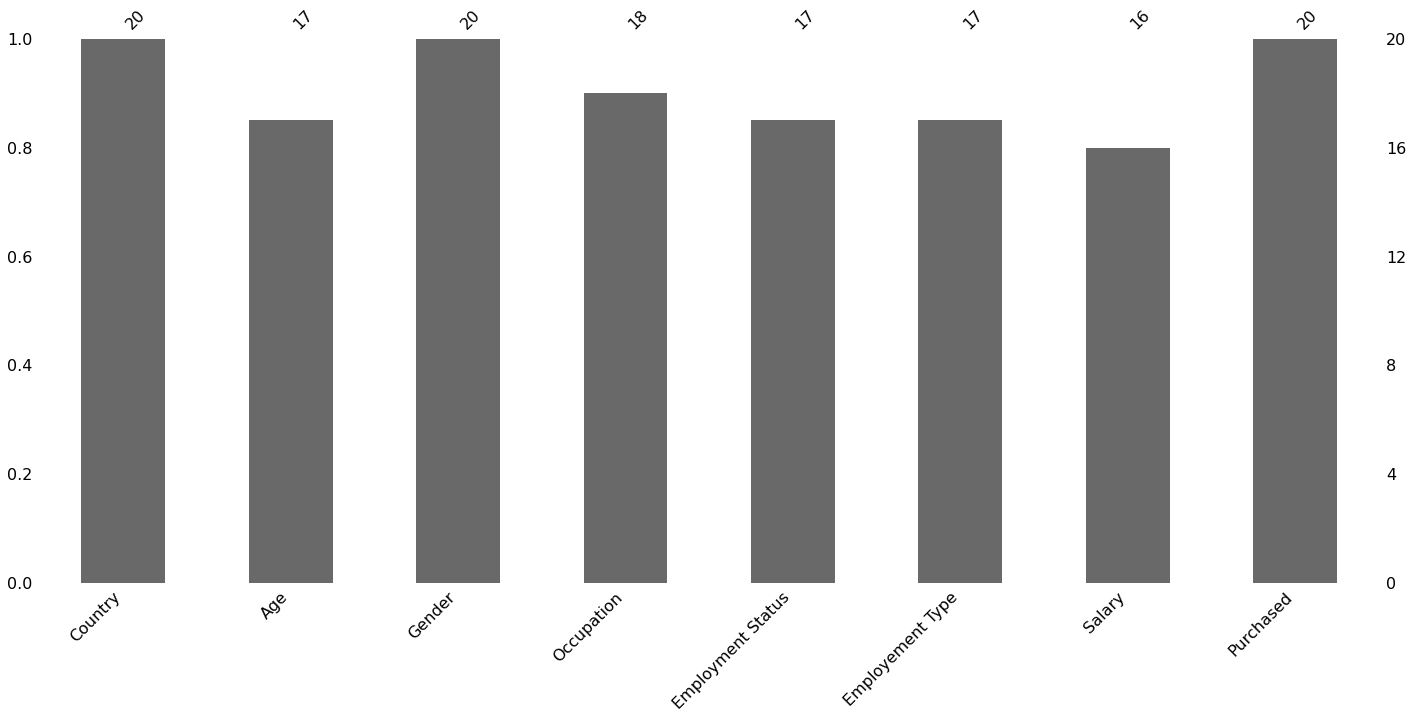

In [17]:
msno.bar(df)

<AxesSubplot:>

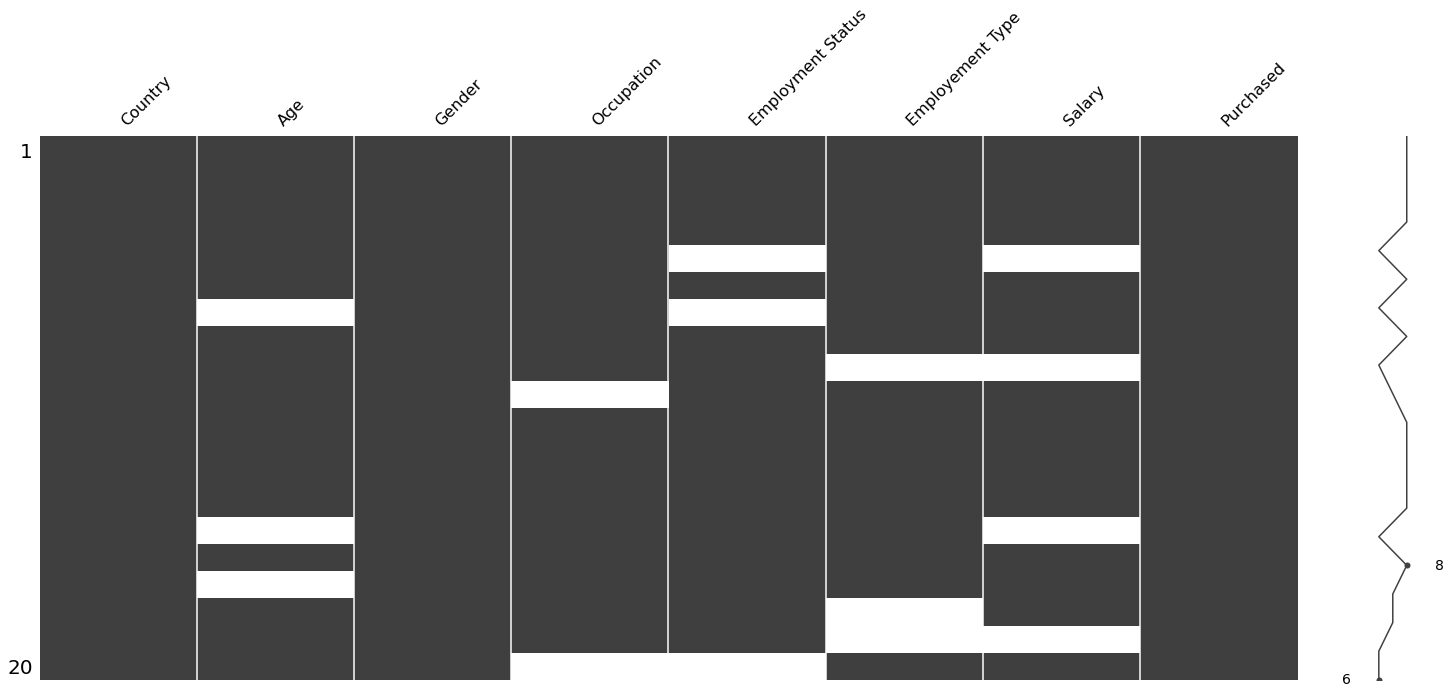

In [18]:
msno.matrix(df)
# columns which have null values have white strips

<AxesSubplot:>

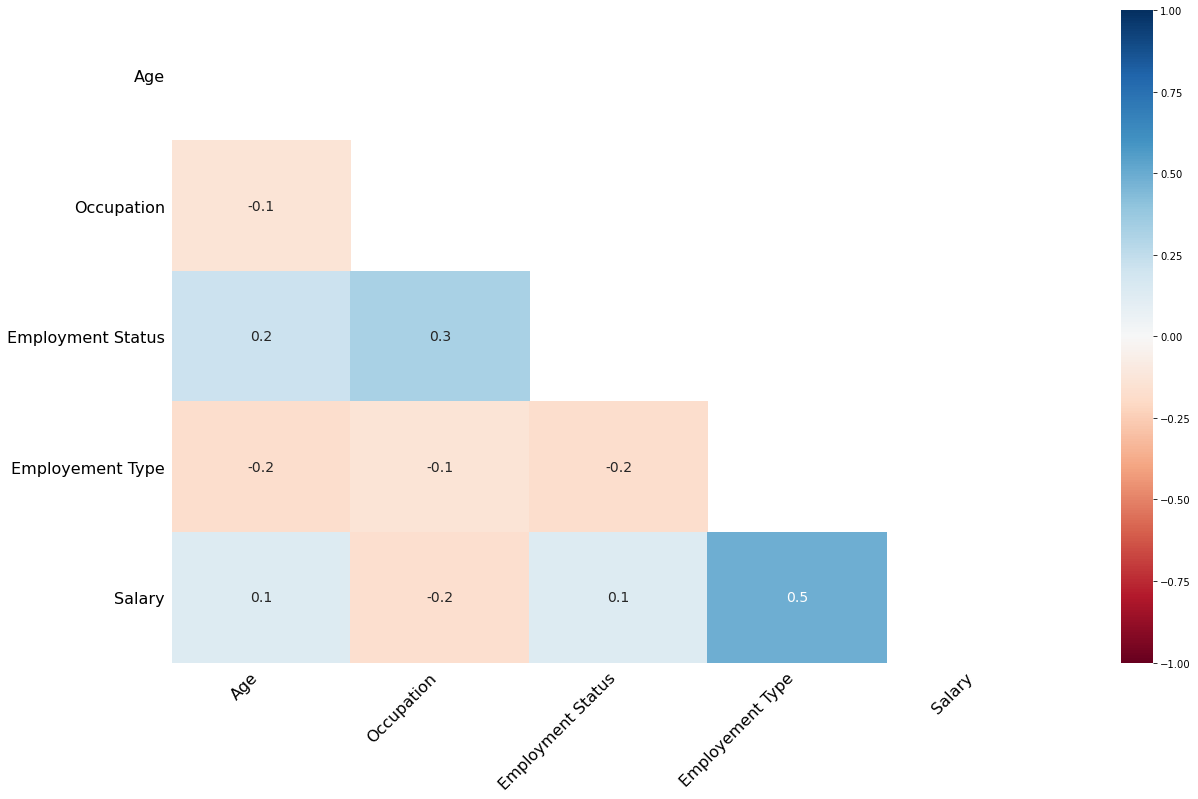

In [19]:
msno.heatmap(df)

<AxesSubplot:>

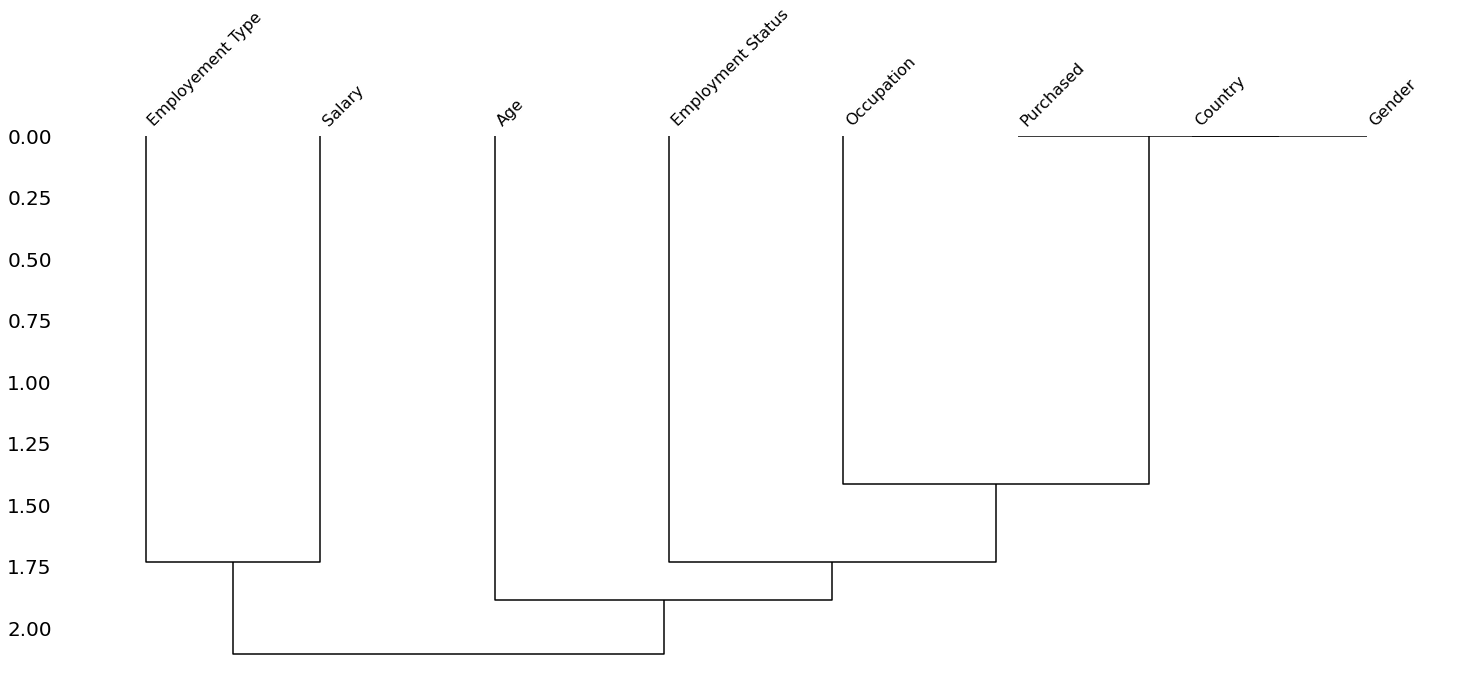

In [21]:
msno.dendrogram(df)
'''
A dendrogram is a diagram that shows the hierarchical relationship between objects. 
It is most commonly created as an output from hierarchical clustering. 
The main use of a dendrogram is to work out the best way to allocate objects to clusters.
'''

## Part - 2 Lable encoding 

##### Label Encoding refers to converting the labels into numeric form so as to convert it into the machine-readable form. Machine learning algorithms can then decide in a better way on how those labels must be operated. It is an important pre-processing step for the structured dataset in supervised learning.

In [27]:
'''Fill the NaN values for Occupation, Emplyment Status and Employement Type'''

col = ['Occupation','Employment Status','Employement Type']
df[col] = df[col].fillna(df.mode().iloc[0])

features = df.iloc[:,:-1 ].values

labels = df.iloc[:,-1].values

In [33]:
labels

array(['No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes',
       'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes'],
      dtype=object)

In [28]:
features

array([['Poland', 34.0, 'Male', 'Salaried', 'Yes', 'Permanent', 72000.0],
       ['Spain', 42.0, 'Female', 'Business', 'Yes', 'Temporary', 48000.0],
       ['Germany', 29.0, 'Male', 'Business', 'No', 'Temporary', 54000.0],
       ['Spain', 38.0, 'Male', 'Business', 'No', 'Permanent', 61000.0],
       ['Germany', 32.0, 'Male', 'Salaried', 'Yes', 'Permanent', nan],
       ['Poland', 31.0, 'Female', 'Business', 'Yes', 'Temporary',
        58000.0],
       ['India', nan, 'Female', 'Salaried', 'Yes', 'Temporary', 52000.0],
       ['Poland', 22.0, 'Female', 'Salaried', 'Yes', 'Self Employed',
        79000.0],
       ['India', 38.0, 'Male', 'Business', 'No', 'Temporary', nan],
       ['Poland', 49.0, 'Male', 'Business', 'Yes', 'Self Employed',
        67000.0],
       ['Brazil', 34.0, 'Male', 'Salaried', 'No', 'Permanent', 70000.0],
       ['Spain', 42.0, 'Female', 'Business', 'No', 'Temporary', 48000.0],
       ['Germany', 29.0, 'Female', 'Business', 'No', 'Temporary',
        54000.0],
   

In [29]:
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()

features[:,0] = encode.fit_transform(features[:,0])
features

array([[4, 34.0, 'Male', 'Salaried', 'Yes', 'Permanent', 72000.0],
       [5, 42.0, 'Female', 'Business', 'Yes', 'Temporary', 48000.0],
       [2, 29.0, 'Male', 'Business', 'No', 'Temporary', 54000.0],
       [5, 38.0, 'Male', 'Business', 'No', 'Permanent', 61000.0],
       [2, 32.0, 'Male', 'Salaried', 'Yes', 'Permanent', nan],
       [4, 31.0, 'Female', 'Business', 'Yes', 'Temporary', 58000.0],
       [3, nan, 'Female', 'Salaried', 'Yes', 'Temporary', 52000.0],
       [4, 22.0, 'Female', 'Salaried', 'Yes', 'Self Employed', 79000.0],
       [3, 38.0, 'Male', 'Business', 'No', 'Temporary', nan],
       [4, 49.0, 'Male', 'Business', 'Yes', 'Self Employed', 67000.0],
       [0, 34.0, 'Male', 'Salaried', 'No', 'Permanent', 70000.0],
       [5, 42.0, 'Female', 'Business', 'No', 'Temporary', 48000.0],
       [2, 29.0, 'Female', 'Business', 'No', 'Temporary', 54000.0],
       [5, 38.0, 'Male', 'Business', 'No', 'Permanent', 61000.0],
       [2, nan, 'Male', 'Salaried', 'Yes', 'Permanent', na

In [31]:
features[:,2] = encode.fit_transform(features[:,2])
features[:,3] = encode.fit_transform(features[:,3])
features[:,4] = encode.fit_transform(features[:,4])
features[:,5] = encode.fit_transform(features[:,5])

In [32]:
features

array([[4, 34.0, 1, 1, 1, 0, 72000.0],
       [5, 42.0, 0, 0, 1, 2, 48000.0],
       [2, 29.0, 1, 0, 0, 2, 54000.0],
       [5, 38.0, 1, 0, 0, 0, 61000.0],
       [2, 32.0, 1, 1, 1, 0, nan],
       [4, 31.0, 0, 0, 1, 2, 58000.0],
       [3, nan, 0, 1, 1, 2, 52000.0],
       [4, 22.0, 0, 1, 1, 1, 79000.0],
       [3, 38.0, 1, 0, 0, 2, nan],
       [4, 49.0, 1, 0, 1, 1, 67000.0],
       [0, 34.0, 1, 1, 0, 0, 70000.0],
       [5, 42.0, 0, 0, 0, 2, 48000.0],
       [2, 29.0, 0, 0, 0, 2, 54000.0],
       [5, 38.0, 1, 0, 0, 0, 61000.0],
       [2, nan, 1, 1, 1, 0, nan],
       [0, 32.0, 0, 0, 1, 2, 58000.0],
       [5, nan, 0, 1, 1, 2, 52000.0],
       [1, 22.0, 0, 1, 1, 2, 85000.0],
       [2, 38.0, 1, 0, 1, 2, nan],
       [1, 45.0, 1, 0, 1, 1, 67000.0]], dtype=object)

## Part - 3 Label Encoder using functions

In [34]:
train = pd.read_csv('train.csv')

train['Age'].fillna(train['Age'].mean,inplace=True)
train.drop(['Cabin'],axis=1,inplace=True)
train['Embarked'].fillna(train['Embarked'].mode()[0],inplace=True)

print(train.info())

print(train.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    object 
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(1), int64(5), object(5)
memory usage: 76.7+ KB
None
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex Age

In [37]:
features = train.iloc[:].values
df = pd.DataFrame(features)
'''------------------------------- L A B E L  E N C O D I  N G------------------'''
# Column Sex, Embarked,
df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.05,S


In [40]:
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()

features[:,4] = encode.fit_transform(features[:,4])
features[:,10] = encode.fit_transform(features[:,10])

df = pd.DataFrame(features)
df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1,0,3,"Braund, Mr. Owen Harris",1,22,1,0,A/5 21171,7.25,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38,1,0,PC 17599,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26,0,0,STON/O2. 3101282,7.925,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35,1,0,113803,53.1,2
4,5,0,3,"Allen, Mr. William Henry",1,35,0,0,373450,8.05,2


In [41]:
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()
features1 = train.iloc[:].values

label_index=[3,4,8,9,10]
df2= pd.DataFrame(features1)
df2.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.05,S


In [42]:
def label_encode(list1,features1):
    for i in range(len(label_index)):
        for j in range(features1.shape[1] + 1):
            if j == label_index[i]:
                features1[:,j] = encode.fit_transform(features1[:,j])




label_encode(label_index,features1)
df3= pd.DataFrame(features1)
df3.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1,0,3,108,1,22,1,0,523,18,2
1,2,1,1,190,0,38,1,0,596,207,0
2,3,1,3,353,0,26,0,0,669,41,2
3,4,1,1,272,0,35,1,0,49,189,2
4,5,0,3,15,1,35,0,0,472,43,2
